In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
 


In [2]:
#importing data
df=pd.read_csv('haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.

In [4]:
df.shape

(306, 4)

In [5]:
df.columns #to know what parameters are present in columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


observation:This way we can understand all the statistical details about the dataset like max, min, mean, std-dev, count, percentile of each parameters

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
#checking the null values
df.isnull().values.any()

False

observation: there are 225 values with 1 and 81 values with 2 ie 73% and 26%

### 1.2 - Explain the objective of the problem.
(The objective is to analyse the dataset i.e performing the EDA and bringing out the valuable information by ploting different types of plots with present values in the dataset and also to statical calculations to know how the values are related to each other, to make a plan accordinly to make a model for predictions)

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

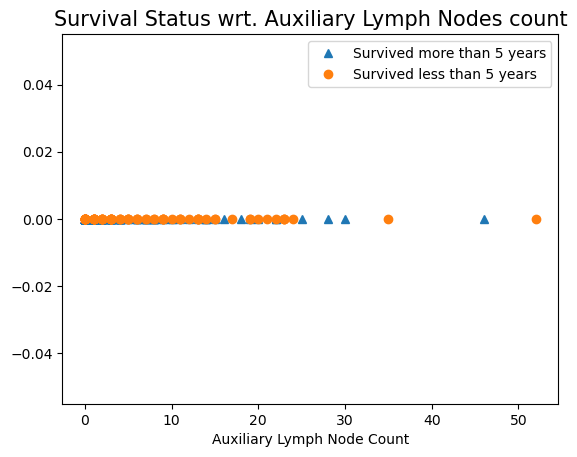

In [13]:
import numpy as np

survived_longer = df.loc[df["status"] == 1]
survived_less = df.loc[df["status"] == 2]

plt.plot(survived_longer["nodes"],np.zeros_like(survived_longer["nodes"]),'^')

plt.plot(survived_less["nodes"],np.zeros_like(survived_less["nodes"]),'o')

plt.xlabel('Auxiliary Lymph Node Count')

plt.legend(["Survived more than 5 years","Survived less than 5 years"])

plt.title('Survival Status wrt. Auxiliary Lymph Nodes count', size = 15)

plt.show()

observation: the points in 1D scatter plot overlap each other so it difficult to know the exact information

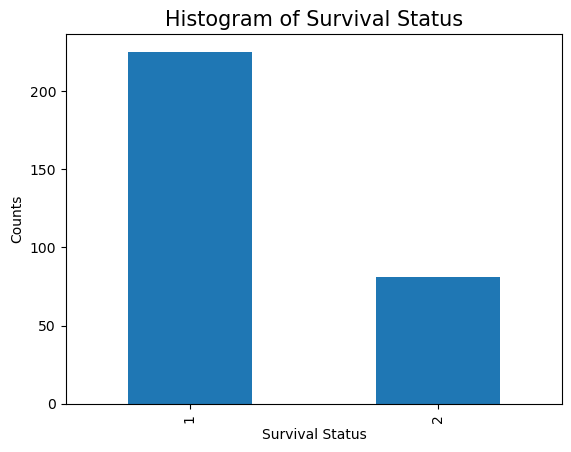

In [22]:
#ploting Bar plot wrt status
count = pd.value_counts(df['status'])
count.plot(kind = 'bar')

plt.xlabel('Survival Status')
plt.ylabel('Counts')

plt.title('Histogram of Survival Status', size = 15)

plt.show()

PDF plots

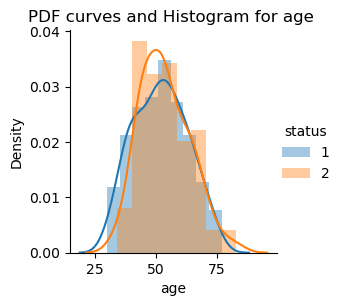

In [26]:
#ploting PDF plot wrt age
sns.FacetGrid(df, hue="status") \
   .map(sns.distplot, "age") \
   .add_legend()
plt.title("PDF curves and Histogram for age ")
plt.show()

observation:

1.in early age 20-40 there are more chances of survival after the surgery.<br>
2.in early age 20- 40 survival marginally dominates non survival, 40-60 non survival marginally dominates and 60-70 there are 50-50 chances of survival.

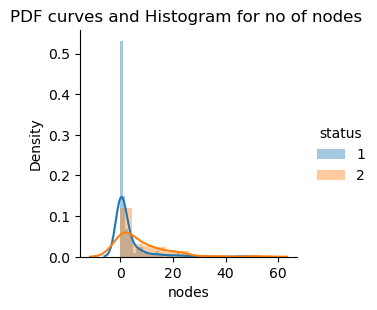

In [29]:
#Ploting PDF plot wrt nodes
sns.FacetGrid(df, hue="status") \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("PDF curves and Histogram for no of nodes ")
plt.show();

observation

1.people with 0 node density have significantly higher chances of survival.<br>
2.people with higher node count the no of survivals is always less then the non survivals.

PDF with CDF Plots

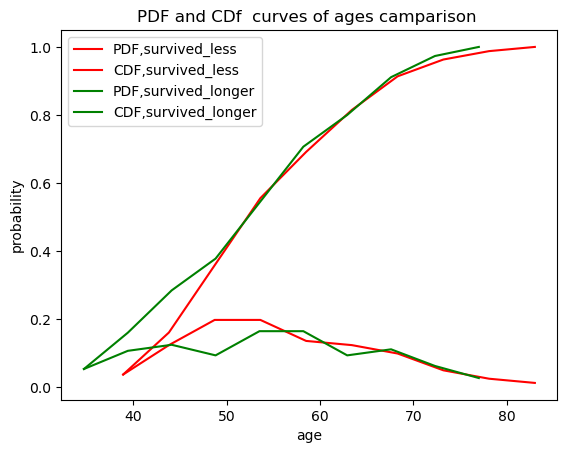

In [33]:
counts, bin_edges = np.histogram(survived_less['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="red", label="PDF,survived_less")
plt.plot(bin_edges[1:], cdf,color="red" ,label="CDF,survived_less")



counts, bin_edges = np.histogram(survived_longer['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="green",label="PDF,survived_longer")
plt.plot(bin_edges[1:], cdf,color="green",label="CDF,survived_longer")


plt.xlabel("age")
plt.ylabel("probability")
plt.legend()
plt.title("PDF and CDf  curves of ages camparison ")
plt.show();

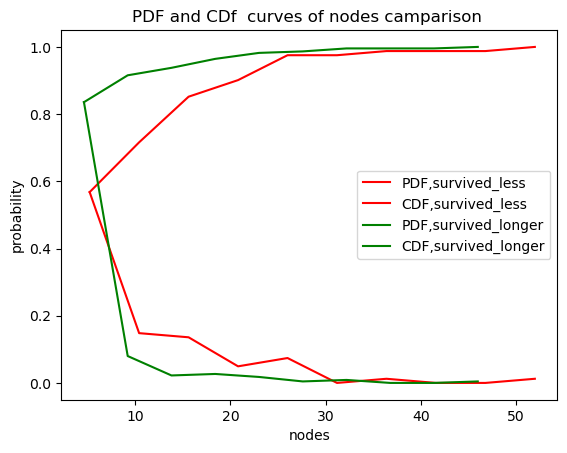

In [35]:
counts, bin_edges = np.histogram(survived_less['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="red", label="PDF,survived_less")
plt.plot(bin_edges[1:], cdf,color="red" ,label="CDF,survived_less")



counts, bin_edges = np.histogram(survived_longer['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="green",label="PDF,survived_longer")
plt.plot(bin_edges[1:], cdf,color="green",label="CDF,survived_longer")


plt.xlabel("nodes")
plt.ylabel("probability")
plt.legend()
plt.title("PDF and CDf  curves of nodes camparison ")
plt.show();

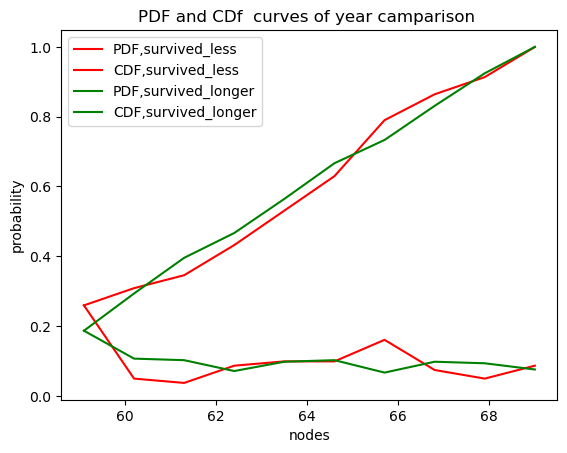

In [37]:
counts, bin_edges = np.histogram(survived_less['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="red", label="PDF,survived_less")
plt.plot(bin_edges[1:], cdf,color="red" ,label="CDF,survived_less")



counts, bin_edges = np.histogram(survived_longer['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="green",label="PDF,survived_longer")
plt.plot(bin_edges[1:], cdf,color="green",label="CDF,survived_longer")


plt.xlabel("nodes")
plt.ylabel("probability")
plt.legend()
plt.title("PDF and CDf  curves of year camparison ")
plt.show();

Box plots

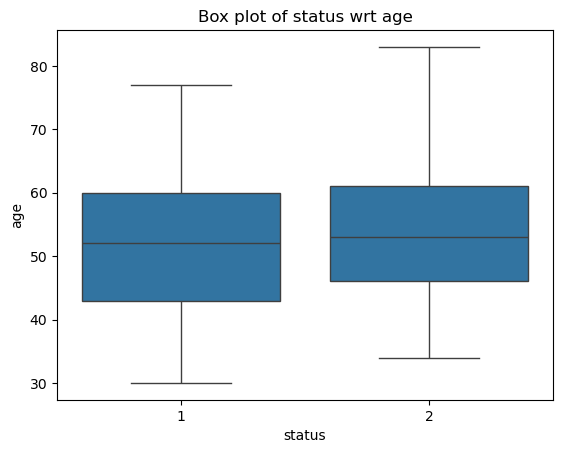

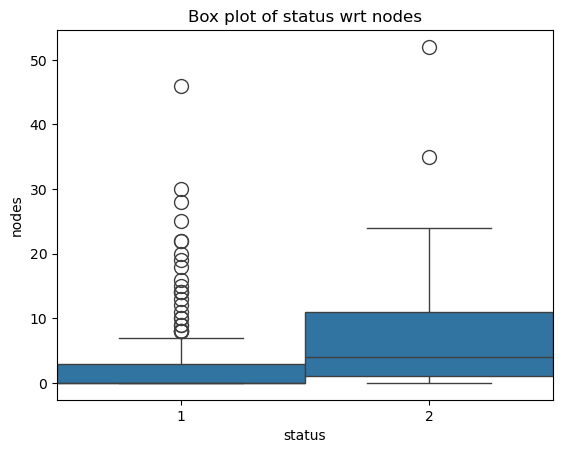

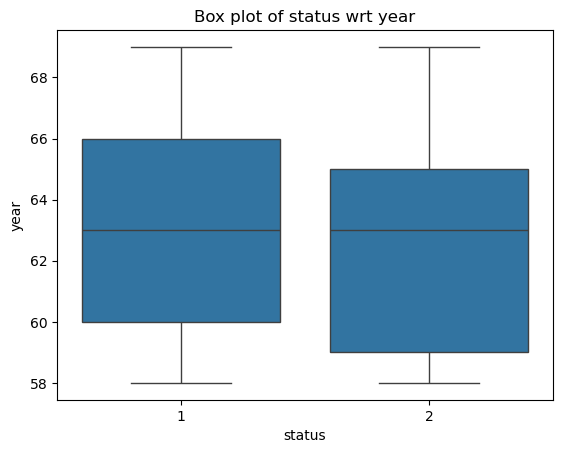

In [40]:
sns.boxplot(x='status',y='age',data=df)
plt.title("Box plot of status wrt age")
plt.show()
sns.boxplot(x='status',y='nodes', data=df,width=1.0,fliersize=10)
plt.title("Box plot of status wrt nodes")
plt.show()
sns.boxplot(x='status',y='year', data=df)
plt.title("Box plot of status wrt year")
plt.show()

Violen Plots

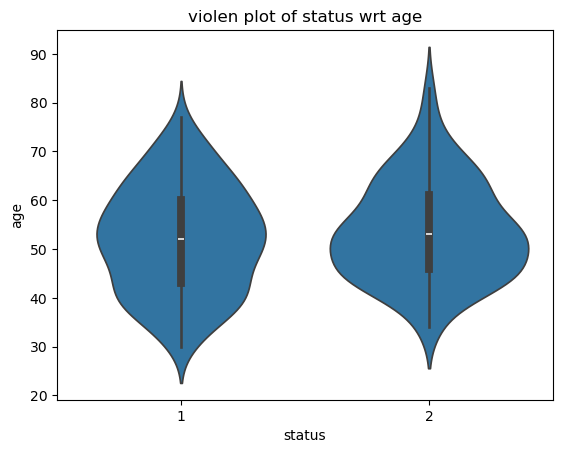

AttributeError: PolyCollection.set() got an unexpected keyword argument 'fliersize'

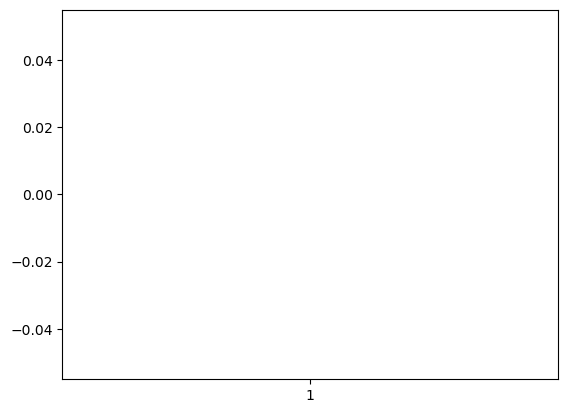

In [43]:
sns.violinplot(x='status',y='age',data=df)
plt.title("violen plot of status wrt age")
plt.show()
sns.violinplot(x='status',y='nodes', data=df,width=1.0,fliersize=10)
plt.title("violen plot of status wrt age")
plt.show()
sns.violinplot(x='status',y='year', data=df)
plt.title("violen plot of status wrt age")
plt.show()

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


In [ ]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue = "status", height = 7)\
.map(plt.scatter, "age", "nodes")\
.add_legend()

plt.xlabel('Auxiliary Lymph Node Count')
plt.ylabel('Age of the patient')

plt.title('Distribution of Lymph Nodes wrt. Age', size = 15)

plt.show()

observation: the points are widely spread, so it is not easy to divide the two types of points

Pair Plot

In [ ]:
plt.close();
sns.set_style("darkgrid");
sns.pairplot(df, hue="status", size=3);
plt.show()

Pair plot gives the plots of all the combination of parameters present in the dataset with 2 variables taken at a time<br>
observation:
The points are highly overlapping it not easy to differentiate points easilty

Calculating Mean, Variance, Std-deviation

In [ ]:
#Mean, Variance, Std-deviation,  
print("Mean for age:")
print("survived longer",np.mean(survived_longer["age"]))
#Mean with an outlier.

print("survived less",np.mean(survived_less["age"]))

print("\nStd-dev for age:");
print("survived longer",np.std(survived_longer["age"]))
print("survived less",np.std(survived_less["age"]))

print("\nMean for nodes:")
print("survived longer",np.mean(survived_longer["nodes"]))
#Mean with an outlier.
print("survived less",np.mean(survived_less["nodes"]))
print("\nStd-dev for nodes:");
print("survived longer",np.std(survived_longer["nodes"]))
print("survived less",np.std(survived_less["nodes"]))


In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print("survived longer",np.median(survived_longer["nodes"]))

print("survived less",np.median(survived_less["nodes"]))



print("\nQuantiles:")
print("survived longer",np.percentile(survived_longer["nodes"],np.arange(0, 100, 25)))
print("survived less",np.percentile(survived_less["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print("survived longer",np.percentile(survived_longer["nodes"],90))
print("survived less",np.percentile(survived_less["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("survived longer",robust.mad(survived_longer["nodes"]))
print("survived less",robust.mad(survived_less["nodes"]))


### 1.5 Summary

- The dataset contains 306 rows and 4 colums and it has 4 parameters in it i.e age, year , nodes, status.
-The parameter status contains 2 values(1,2) i.e The Patients survived- 225 , then the one who died -81 after 5 years of surgery with 73:36 % ratio,  hence the data is imbalanced so the predictde output maynot be accurate.
- When we oberve the scatter plots the points are totally distributed there is no way to sepererate the two types of values.
-The average value of age for the patients who survived after the surgery is 52.01
-people with less no of nodes survived longer than the people who have more no of nodes,people of age more than 40 have more no of nodes.
- 75% of people who survived have age less then 60 years of age and no one above age of 75 survived.
